In [ ]:
import pandas as pd

# 替換為正確的檔案路徑
file_path = '/content/drive/My Drive/Titanic/train.csv'
data_train = pd.read_csv(file_path)

# 查看資料
print(data_train.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
from google.colab import files

# 上傳檔案
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

# 讀取資料
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

# 檢視數據內容
print(data_train.head())
print(data_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 處理 Age 缺失值並分段
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())
data_train['AgeGroup'] = pd.cut(data_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young', 'Adult', 'Senior'])

# 處理票價並分段
data_train['FareGroup'] = pd.qcut(data_train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# 將 Sex 編碼
data_train['Sex'] = data_train['Sex'].map({'male': 0, 'female': 1})

# 提取 Cabin 的第一個字母
data_train['CabinInitial'] = data_train['Cabin'].str[0].fillna('Unknown')

# 提取 Name 中的稱謂
data_train['Title'] = data_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
data_train['Title'] = data_train['Title'].replace(rare_titles, 'Rare')

# 刪除不必要的欄位
data_train = data_train.drop(columns=['Ticket', 'Name', 'Embarked', 'Cabin'])

# 檢視處理後的資料
print(data_train.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare AgeGroup  \
0            1         0       3    0  22.0      1      0   7.2500    Young   
1            2         1       1    1  38.0      1      0  71.2833    Adult   
2            3         1       3    1  26.0      0      0   7.9250    Young   
3            4         1       1    1  35.0      1      0  53.1000    Young   
4            5         0       3    0  35.0      0      0   8.0500    Young   

   FareGroup CabinInitial Title  
0        Low      Unknown    Mr  
1  Very High            C   Mrs  
2     Medium      Unknown  Miss  
3  Very High            C   Mrs  
4     Medium      Unknown    Mr  


In [ ]:
from sklearn.model_selection import train_test_split

# 將 PassengerId 移除，因為它與目標無關
X = data_train.drop(['PassengerId', 'Survived'], axis=1)  # 特徵
y = data_train['Survived']  # 目標

# 分割數據，20% 作為測試集
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 查看分割後的訓練數據
print(train_data.head())
print(train_labels.head())


     Pclass  Sex   Age  SibSp  Parch     Fare AgeGroup  FareGroup  \
331       1    0  45.5      0      0  28.5000    Adult       High   
733       2    0  23.0      0      0  13.0000    Young     Medium   
382       3    0  32.0      0      0   7.9250    Young     Medium   
704       3    0  26.0      1      0   7.8542    Young        Low   
813       3    1   6.0      4      2  31.2750    Child  Very High   

    CabinInitial Title  
331            C    Mr  
733      Unknown    Mr  
382      Unknown    Mr  
704      Unknown    Mr  
813      Unknown  Miss  
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64


In [ ]:
from pycaret.classification import *

# 初始化 PyCaret
clf = setup(
    data=data_train,
    target='Survived',
    ignore_features=['PassengerId'],  # 忽略無用特徵
    session_id=42  # 固定隨機種子，確保結果可重現
)


,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 31)"
5,Transformed train set shape,"(623, 31)"
6,Transformed test set shape,"(268, 31)"
7,Ignore features,1
8,Numeric features,6
9,Categorical features,4


In [ ]:
# 比較模型性能
best_model = compare_models()

# 顯示最佳模型
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8347,0.8648,0.7368,0.8220,0.7736,0.6444,0.6501,0.2430
ridge,Ridge Classifier,0.8202,0.8638,0.7451,0.7790,0.7593,0.6164,0.6191,0.1090
lda,Linear Discriminant Analysis,0.8202,0.8612,0.7451,0.7789,0.7595,0.6165,0.6189,0.1190
rf,Random Forest Classifier,0.8188,0.8534,0.7538,0.7800,0.7619,0.6163,0.6212,0.3460
et,Extra Trees Classifier,0.8172,0.8304,0.7621,0.7654,0.7613,0.6136,0.6159,0.3040
lightgbm,Light Gradient Boosting Machine,0.8139,0.8631,0.7120,0.7891,0.7437,0.5989,0.6054,0.7020
xgboost,Extreme Gradient Boosting,0.8138,0.8586,0.7415,0.7718,0.7505,0.6029,0.6088,0.1850
ada,Ada Boost Classifier,0.8137,0.8362,0.7453,0.7740,0.7538,0.6049,0.6107,0.3590
lr,Logistic Regression,0.8122,0.8629,0.7368,0.7660,0.7489,0.5995,0.6018,1.0920
dt,Decision Tree Classifier,0.7834,0.7698,0.7284,0.7173,0.7194,0.5436,0.5467,0.1100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
from google.colab import files

# 下載模型文件
files.download("best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 獲取模型比較結果
results = pull()

# 儲存為 CSV 文件
results.to_csv("model_comparison_results.csv", index=False)

# 檢視結果
print(results.head())


                              Model  Accuracy     AUC  Recall   Prec.      F1  \
gbc    Gradient Boosting Classifier    0.8347  0.8648  0.7368  0.8220  0.7736   
ridge              Ridge Classifier    0.8202  0.8638  0.7451  0.7790  0.7593   
lda    Linear Discriminant Analysis    0.8202  0.8612  0.7451  0.7789  0.7595   
rf         Random Forest Classifier    0.8188  0.8534  0.7538  0.7800  0.7619   
et           Extra Trees Classifier    0.8172  0.8304  0.7621  0.7654  0.7613   

        Kappa     MCC  TT (Sec)  
gbc    0.6444  0.6501     0.243  
ridge  0.6164  0.6191     0.109  
lda    0.6165  0.6189     0.119  
rf     0.6163  0.6212     0.346  
et     0.6136  0.6159     0.304  


In [ ]:
save_model(best_model, "best_model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Sex', 'Age', 'SibSp',
                                              'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include...
                                             criterion='friedman_mse', init=None,
           

In [ ]:
from google.colab import drive

# 掛載 Google Drive
drive.mount('/content/drive')

# 保存文件到指定路徑
results.to_csv('/content/drive/My Drive/model_comparison_results.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pycaret.classification import *

# 加載保存的最佳模型
best_model = load_model("best_model")
print(best_model)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Sex', 'Age', 'SibSp',
                                             'Parch', 'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=N...
                                            criterion='friedman_mse', init=None,
         

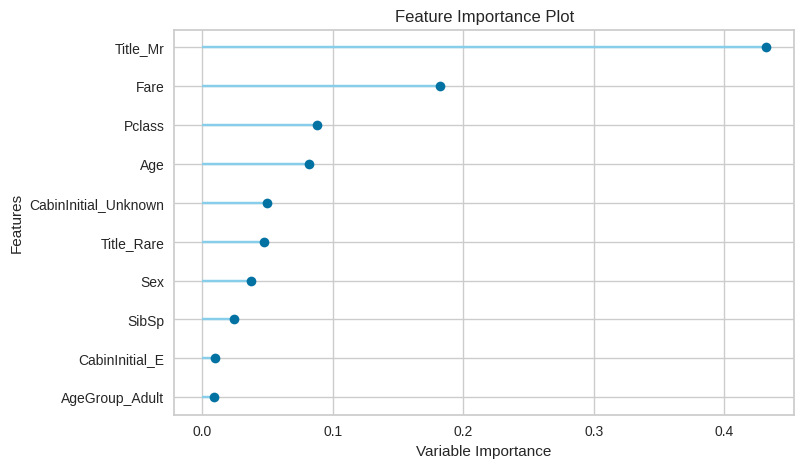

In [ ]:
# 查看特徵重要性
plot_model(best_model, plot='feature')


In [ ]:
# 新增交互特徵
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch']
data_train['FarePerPerson'] = data_train['Fare'] / (data_train['FamilySize'] + 1)


In [ ]:
# 對最佳模型進行調參
tuned_model = tune_model(best_model, optimize='Accuracy')
print(tuned_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.9199,0.8333,0.7692,0.8000,0.6688,0.6702
1,0.8571,0.9087,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.7937,0.8851,0.6667,0.7619,0.7111,0.5517,0.5547
3,0.8548,0.9153,0.8261,0.7917,0.8085,0.6917,0.6921
4,0.8871,0.8575,0.7083,1.0000,0.8293,0.7486,0.7734
5,0.8871,0.9112,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8226,0.8613,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.7903,0.7966,0.6250,0.7895,0.6977,0.5405,0.5491
8,0.8548,0.8629,0.7917,0.8261,0.8085,0.6917,0.6921


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_samples_leaf=4,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=270, n_iter_no_change=None,
                           random_state=42, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
save_model(tuned_model, "optimized_model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Sex', 'Age', 'SibSp',
                                              'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include...
                                             criterion='friedman_mse', init=None,
           

In [ ]:
from google.colab import files

# 下載模型文件
files.download("optimized_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# 使用 PyCaret 創建基礎模型
rf = create_model('rf')  # Random Forest
et = create_model('et')  # Extra Trees

# 堆疊模型
stacked_model = stack_models([tuned_model, rf, et])


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8718,0.7500,0.6923,0.7200,0.5363,0.5375
1,0.7619,0.8323,0.5833,0.7368,0.6512,0.4741,0.4816
2,0.7937,0.8424,0.6667,0.7619,0.7111,0.5517,0.5547
3,0.8710,0.9359,0.9130,0.7778,0.8400,0.7330,0.7397
4,0.8710,0.8366,0.7083,0.9444,0.8095,0.7149,0.7319
5,0.9032,0.9117,0.8333,0.9091,0.8696,0.7929,0.7948
6,0.8548,0.8898,0.7500,0.8571,0.8000,0.6869,0.6906
7,0.7903,0.7780,0.7500,0.7200,0.7347,0.5615,0.5618
8,0.8548,0.8405,0.8333,0.8000,0.8163,0.6964,0.6968


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8360,0.7500,0.6923,0.7200,0.5363,0.5375
1,0.7619,0.7842,0.5833,0.7368,0.6512,0.4741,0.4816
2,0.7937,0.7917,0.7083,0.7391,0.7234,0.5590,0.5593
3,0.8871,0.9125,0.9130,0.8077,0.8571,0.7644,0.7683
4,0.8226,0.8257,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8871,0.9221,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8871,0.8734,0.8333,0.8696,0.8511,0.7602,0.7607
7,0.7742,0.7621,0.7083,0.7083,0.7083,0.5241,0.5241
8,0.8548,0.8158,0.8333,0.8000,0.8163,0.6964,0.6968


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8974,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.8254,0.8868,0.6250,0.8824,0.7317,0.6078,0.6277
2,0.8095,0.8771,0.6250,0.8333,0.7143,0.5758,0.5892
3,0.8548,0.9275,0.8261,0.7917,0.8085,0.6917,0.6921
4,0.8548,0.8465,0.6667,0.9412,0.7805,0.6767,0.6992
5,0.8871,0.9035,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8226,0.8816,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.7742,0.7829,0.6250,0.7500,0.6818,0.5090,0.5141
8,0.8548,0.8372,0.8333,0.8000,0.8163,0.6964,0.6968


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# 保存堆疊模型
save_model(stacked_model, "stacked_model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Sex', 'Age', 'SibSp',
                                              'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include...
                                                                       verbose=0,
           

In [ ]:
from google.colab import files

# 下載模型文件
files.download("stacked_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>